___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
<center>*Copyright Pierian Data 2017*</center>
<center>*For more information, visit us at www.pieriandata.com*</center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
airline = pd.read_csv('airline_passengers.csv',index_col="Month")

In [3]:
airline.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


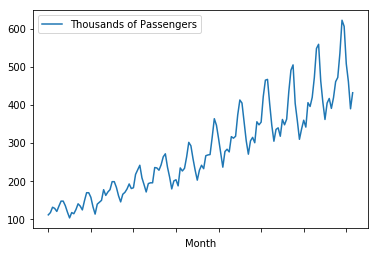

In [4]:
airline.plot()

## ETS

We can use an additive model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time (e.g. every year we add 10,000 passengers). A multiplicative model is more appropriate when we are increasing (or decreasing) at a non-linear rate (e.g. each year we double the amount of passengers).

Based off this chart, it looks like the trend in these earlier days is slightly increasing at a higher rate than just linear (although it is a  bit hard to tell from this one plot).

In [7]:
# Get data in correct format
airline.dropna(inplace=True)
airline.index = pd.to_datetime(airline.index)

In [6]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


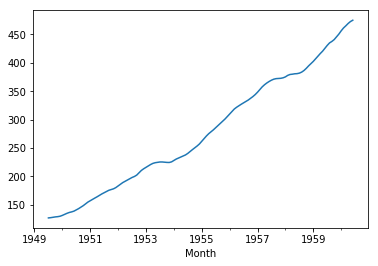

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')
result.trend.plot()

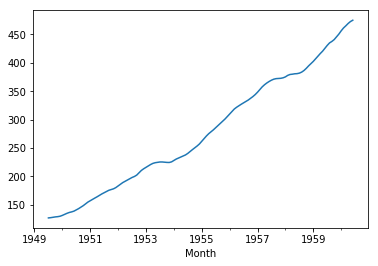

In [14]:
# You may accidentally see two of the same plots here, not to worry,
# just a small bug with statsmodels function.
result = seasonal_decompose(airline['Thousands of Passengers'], model='additive')
result.trend.plot()